In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#%pip install seaborn
import seaborn as sns

np.set_printoptions(suppress=True)

In [54]:
import os
os.chdir('/mnt/c/Users/cardon/OneDrive - Rensselaer Polytechnic Institute/SEM8/COGMOD/cognitive-modeling/natalie-classwork/Code_Along')
print(os.getcwd())

/mnt/c/Users/cardon/OneDrive - Rensselaer Polytechnic Institute/SEM8/COGMOD/cognitive-modeling/natalie-classwork/Code_Along


# Numpy Basics

<p>NumPy is Python's most used library for efficient numerical computations. At the core of numpy lies the N-dimensional array data structure (also called a numpy array).</p>

<p>An array is defined by the <strong>type</strong> of elements it contains and its <strong>shape</strong>. For instance, a matrix may be represented as an array of shape (<em>N</em> x <em>M</em>). Note, that numpy arrays can have arbirary shape (<em>Dim1</em>, <em>Dim2</em>, <em>Dim3</em>,...).</p> 

<div>
<img src="https://predictivehacks.com/wp-content/uploads/2020/08/numpy_arrays-1024x572.png" width="75%"/>
</div>


<p>Besides being a convenient data container, numpy arrays provide an interface to many <strong>vectorized</strong> operations, implemented in native C code. Vectorization in interpreted languages is a means to speed up repetitive computations (elementwise operations, etc.). Thus, vectorization saves your time and makes you more productive!</p>

For more information about the nuts and bolts of numpy, check out the very well writte numpy documentation:
https://docs.scipy.org/doc/numpy/user/quickstart.html

Also, check out this very informative tutorial paper:
https://arxiv.org/pdf/1102.1523.pdf

<p>Now, let's get some hands-on experience with numpy arrays!</p> 

## Creating numpy arrays

In [3]:
# Numbers in a given range (from:to:step)


In [2]:
# Linearly spaced items


In [4]:
# Array of zeros


In [5]:
# Matrix of zeros


In [6]:
# Identity matrix


In [7]:
# Random uniform numbers [0 - 1]


In [8]:
# Random integers (low - high, high is exclusive)


In [9]:
# Normally distributed random numbers?


### Reading from a file

In [10]:
# Create a random matrix
mat = np.random.rand(10,10)

# Save compressed
np.save('mat.npy', mat)

# Save uncompressed
np.savetxt('mat.txt', mat)

In [11]:
# Load from a compressed array
mat = np.load('mat.npy')

In [12]:
# Load from a text file
mat = np.loadtxt('mat.txt')

## Methods and attributes of numpy arrays

In [13]:
# Figuring out the shape
nrow, ncol = mat.shape

In [14]:
# Figuring out the type of data
mat.dtype

#mat.astype(np.float32) -> changes the data type 

dtype('float64')

In [15]:
# Figuring out the total number of elements
mat.size

100

In [16]:
# Aggregation
arr = np.random.normal(size=20)

In [17]:
# Find min, max, argmax, argmin, mean, std, etc...
print('Minimum value: ', arr.min())
print('Maximum value: ', arr.max())
print('Index of minimum value: ', arr.argmin())
print('Index of maximum value: ', arr.argmax())

print('----------------------------')

# Alternatively, you could use the "functional grammer" of numpy
print('Minimum value: ', np.min(arr))
print('Maximum value: ', np.max(arr))
print('Index of minimum value: ', np.argmin(arr))
print('Index of maximum value: ', np.argmax(arr))

Minimum value:  -1.781830987567436
Maximum value:  2.476450156441168
Index of minimum value:  3
Index of maximum value:  8
----------------------------
Minimum value:  -1.781830987567436
Maximum value:  2.476450156441168
Index of minimum value:  3
Index of maximum value:  8


In [18]:
# How about nd arrays? (axis)
mat.mean(axis = (0,1)) 

0.5460179575626493

## Indexing and selection of numpy arrays

### Indexing 1D arrays

In [19]:
# Indexing a single number


In [20]:
# Indexing a range of numbers (similar to slicing python lists)


In [21]:
# From index (inclusive) 


In [22]:
# Assigning a slice to a variable


### Indexing ND arrays

### Conditional selection

In [33]:
# Create a boolean array (array of 0s and 1s)
arr[arr > 1]

array([1.34049295, 1.35857427, 1.67212133, 2.47645016, 1.58682774])

In [24]:
# Index with a boolen array (keep only elements whose index corresponds to True)


<p><strong>Time for a short exercise!</strong></p>

Suppose you have a matrix which contains the response times of 50 participants, where each row represents an individual participant.
Your data contains missing values, coded as '999' by your student assistant. Your want to take a quick look at the data by:

1. Loading the file "rt_missing.txt"
2. Replacing all 999 values with the value np.nan
3. Computing the mean and variance of the the response times for each participant<br>

Hint: try to use `np.mean()` and `np.var()` to see what happens and look for a solution.

In [25]:
means = None
variances = None

In [72]:
arr = np.loadtxt('rt_missing.txt', delimiter = ';')
arr[arr == 999.000] = np.nan
means = np.mean(arr, axis = 0)
variances = np.var(arr, axis = 0)

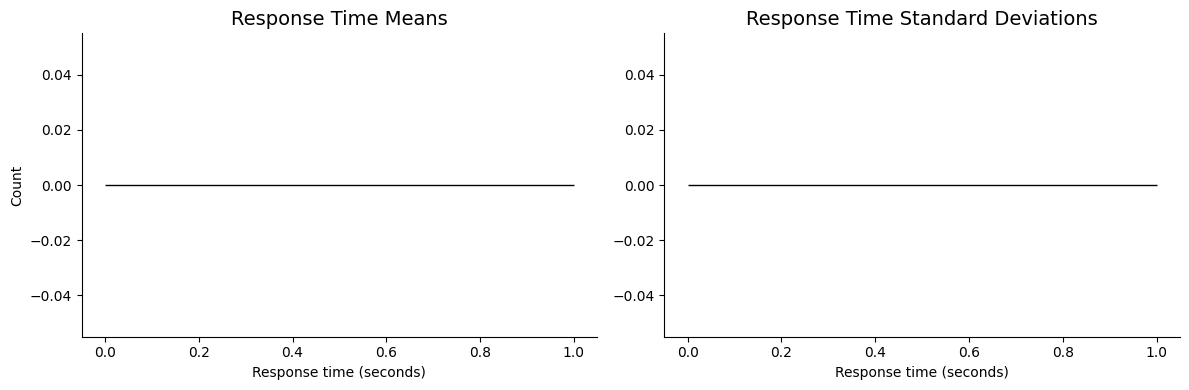

In [73]:
# Test your code
f, axarr = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(means, ax=axarr[0], color='#aa0000', alpha=0.6)
sns.histplot(np.sqrt(variances), ax=axarr[1], color='#0000aa', alpha=0.6)

for ax in axarr:
    sns.despine(ax=ax)
    ax.set_xlabel('Response time (seconds)')
axarr[0].set_title('Response Time Means', fontsize=14)
axarr[1].set_title('Response Time Standard Deviations', fontsize=14)
axarr[1].set_ylabel('')
f.tight_layout()

## Operations on numpy arrays

### Scalar-array operations

In [ ]:
# All scalar-array algebraic operations are performed element-wise


# Multiplication by a scalar


In [ ]:
# Addition of a scalar


### Array-array operations

In [ ]:
# You can perform all usual linear algebra operations on numpy arrays


In [ ]:
# Elementwise multiplication


In [ ]:
# Elementwise addition


<p><strong>Matrix Multiplication Memo :)</strong><p>
    
![Matrix Multiplication Memo](https://www.mathsisfun.com/algebra/images/matrix-multiply-a.svg)

In [ ]:
# Matmul
#res = np.matmul(mat, mat2)
#res = mat @ mat2
#res = mat.dot(mat2)
res = np.dot(mat, mat2)

In [79]:
u1 = np.random.rand(100000)
u2 = np.random.rand(100000)

In [80]:
# Speed comparison between vectorized operations and pure Python loops
# We use the "magic" keyword time to to estimate running time of a cell
# Dot product
%timeit u1 @ u2

16.5 µs ± 3.67 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [87]:
# Naive implementation of the dot product
@timeit
def dot_product(v1, v2):
    """Naive dot product implementation."""
    
    p = 0
    for i in range(len(v1)):
        p += v1[i] * v2[i]
    return p

In [81]:
%timeit dot_product(u1,u2) #slow

42.5 ms ± 832 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Aside: Decorators

In [84]:
from time import perf_counter

def timeit(func):
    def wrapper(*args):
        t1 = perf_counter()
        out = func(*args)
        t2 = perf_counter()
        print(f'Execution Time: {t2-t1}s')
        return out
    return wrapper


In [90]:
#dot = timeit(dot_product)
#dot(u1, u2)
dot_product(u1, u2)

Execution Time: 0.04208610000023327s


25163.589193990974

### Universal functions

In [ ]:
# Exponential, log, etc (it's all performed elementwise!)

## Exercise: OLS Regression with numpy

<p>In this exercise, we will compute the parameters (weights) of an OLS regression using only numpy (and our linear algebra knowledge).</p>
<p>The forward equation for OLS regression is given by:</p>

$$\hat{y} = \mathbf{X}\beta$$

where $\mathbf{X}$ is an $N{\times}M$ matrix of covariates, and $\beta$ is a vector of parameters estimated from the data. In OLS regression, we seek to minimize the MSE (mean squared error) criterion:

$$MSE(\beta) = \frac{1}N\sum_{i=1}^N(y_i - \hat{y_i})^2$$

<p>which can be written in matrix form as</p>

$$MSE(\beta) = (y - \mathbf{X}\beta)^T(y - \mathbf{X}\beta)$$

setting the gradient of the MSE criterion to zero and solving for $y$, we obtain the following solution which minimizes the MSE:<br>

$$\beta^* = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^Ty$$

See this excellent post for a full derivation: https://eli.thegreenplace.net/2014/derivation-of-the-normal-equation-for-linear-regression

Thus, in order to complete this exercise, you need to follow these steps:
1. Generate X (covariates) and y (outcome) by calling the `simulate_ols_data()` function
2. Complete the `ols(X, y)` function by computing the solution to the normal equation
3. Compare your best parameters with the parameters returned by the numpy function `numpy.linalg.lstsq(X, y)`
4. Compute RMSE on the training data by completing the function `rmse(y, y_hat)`. The RMSE is given by:
<br>
<br>

$$RMSE= \sqrt{\frac{1}N\sum_{i=1}^N(y_i - \hat{y_i})^2}$$

In [ ]:
def simulate_ols_data(N=100, M=3):
    """Function to simulate synthetic regression data."""
    
    # Generate design matrix
    X = np.random.randn(N, M)

    # Add intercept to model
    X = np.c_[np.ones(shape=(N, 1)), X]

    # Generate true beta ~ N(0, 1)
    beta_true = np.random.randn(M + 1)

    # Compute noisy linear function
    y = X @ beta_true + np.random.randn(N)

    return X, y, beta_true

In [ ]:
def ordinary_least_squares(X, y):
    """Function to compute the parameters of an OLS regression."""
    
    # YOUR CODE HERE
    pass

In [ ]:
def rmse(y, y_hat):
    """Function to compute the RMSE between predictions and outcomes."""
    
    # YOUR CODE HERE
    pass

In [ ]:
# 1. Simulate regression data
X, y, beta_true = simulate_ols_data(N=10000)

# 2. Obtain best parameters
beta_hat = ordinary_least_squares(X, y)

# 3. Obtain best parameters using numpy.linalg.lstsq
beta_hat_np = np.linalg.lstsq(X, y, rcond=None)[0]

# 4. Compute RMSE on training data
y_hat = X @ beta_hat_np

rmse_train = rmse(y, y_hat)

In [ ]:
print('True betas: ', beta_true)
print('OLS betas: ', beta_hat)
print('Numpy LSTSQ betas', beta_hat_np)
print('RMSE train: ', rmse_train)

# Aside on plotting

Let's load some personality dataset containing raw data from the International Personality Item Pool designed to measure Cattell's 16 personality factors. 

# Final exercise: PCA

![PCA meme](https://media.makeameme.org/created/brace-yourself-pca.jpg)

<p>PCA learns a representation of multidimensional data which has lower dimensionality than the original data.</p>
Furthermore is an orthogonal linear projection of the data, meaning that it decorrelates the dimensions of the learned representation.

Consider a data matrix $\mathbf{X}$. Suppose further that the data has been standardized (centered and scaled). The unbiased estimate of the covariance matrix is given by:

$$\widehat{Cov}[\mathbf{X}] = \frac{1}{m - 1}\mathbf{X}^T\mathbf{X}$$

A popular variant of PCA performs an eigendecomposition of $\mathbf{X}^T\mathbf{X}$ defined by:

$$\widehat{Cov}[\mathbf{X}] = \mathbf{V}\mathbf{\Lambda}\mathbf{V}^T$$

where $\mathbf{V}$ is the matrix of <em>eigenvectors</em> of $\widehat{Cov}[\mathbf{X}]$ and $\mathbf{\Lambda}$ is a diagonal matrix of <em>eigenvalues</em>.

(Note, that sometimes the decomposition is performed on the scatter matrix instead $\mathbf{X}^T\mathbf{X}$. This does not change the eigenvectors, but simply scales the eigenvalues.) 

In other words, we decompose the covariance matrix into a scale part (eigenvalues) and direction part (eigenvectors). The eigenvectors are the principle components of the $\widehat{Cov}[\mathbf{X}]$.

Eigenvectors determine orthogonal directions in feature space. Each component of the eigenvector encodes how each of the original dimension directions contributes to the eigenvector. The first eigenvector (first PC) encodes the direction of most variance, and so on.
Eigenvalues represent how much of the original variance is captured (explained) in the direction of the corresponding eigenvector.

Read in the data `extraversion_big5.csv` and complete the code below.

In [ ]:
import pandas as pd

df = pd.read_csv('extraversion_big5.csv', sep=';', header=0)

In [ ]:
# Standardize data
### Your code here

# Compute covariance matrix
cov = None

# Perform an eigendecomposition
### Your code here
lambd, V = None, None

# Check reconstruction of the covariance matrix
np.allclose(V @ np.diag(lambd) @ V.T, cov) 

True

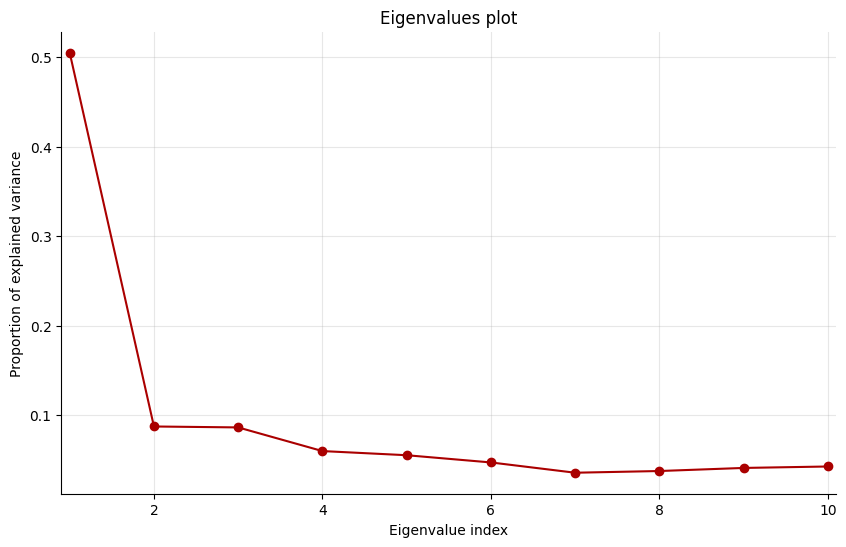

In [ ]:
# Check results
f, ax = plt.subplots(figsize=(10, 6))
ax.plot(np.arange(1, lambd.shape[0]+1), lambd / np.sum(lambd), '-o', color='#aa0000')
ax.set_xlim([1 - 0.1, 10 + 0.1])
ax.set_xlabel('Eigenvalue index')
ax.set_ylabel('Proportion of explained variance')
ax.set_title('Eigenvalues plot')
ax.grid(alpha=0.3)
sns.despine(ax=ax)